In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# 加载数据
df = pd.read_csv(r'C:\Users\wangxin\Desktop\AutoEncoder_tensorflow--main\rating.csv', sep=',', names=['user', 'item', 'rating'], header=None)

# df
num_items = df.item.nunique()
num_users = df.user.nunique()

print("USERS: {} ITEMS: {}".format(num_users, num_items))

USERS: 333 ITEMS: 300


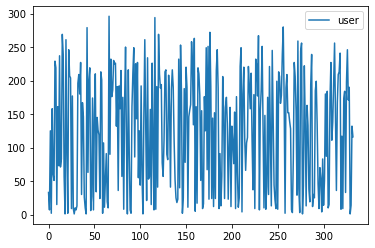

In [4]:
pd.DataFrame(df.user.value_counts().sort_index()).plot.line()
plt.show()

<AxesSubplot:>

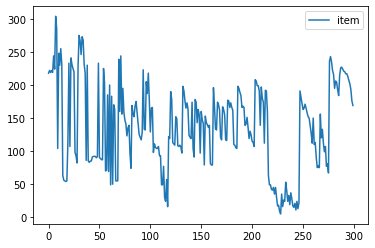

In [5]:
pd.DataFrame(df.item.value_counts().sort_index()).plot.line()

<AxesSubplot:>

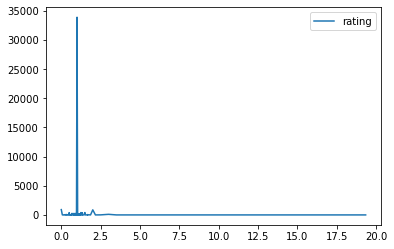

In [6]:
pd.DataFrame(df.rating.value_counts().sort_index()).plot.line()

In [7]:
df.head()

,user,item,rating
0,0.0,39.0,1.0
1,0.0,40.0,1.0
2,0.0,41.0,1.0
3,0.0,42.0,1.0
4,0.0,43.0,1.0


In [8]:
# 对输入做Normalization
from sklearn import preprocessing
r = df['rating'].values.astype(float)
print(r)
print(r.reshape(-1,1))
min_max_scaler = preprocessing.MinMaxScaler(feature_range=[0, 1])
x_scaled = min_max_scaler.fit_transform(r.reshape(-1,1))
# x_scaled = min_max_scaler.fit_transform(r)
print(x_scaled)
df_normalized = pd.DataFrame(x_scaled)
df['rating'] = df_normalized
print(df)

[1.   1.   1.   ... 1.   1.   0.75]
[[1.  ]
 [1.  ]
 [1.  ]
 ...
 [1.  ]
 [1.  ]
 [0.75]]
[[0.05172503]
 [0.05172503]
 [0.05172503]
 ...
 [0.05172503]
 [0.05172503]
 [0.03879377]]
        user   item    rating
0        0.0   39.0  0.051725
1        0.0   40.0  0.051725
2        0.0   41.0  0.051725
3        0.0   42.0  0.051725
4        0.0   43.0  0.051725
...      ...    ...       ...
41261  332.0  260.0  0.051725
41262  332.0  267.0  0.051725
41263  332.0  268.0  0.051725
41264  332.0  269.0  0.051725
41265  332.0   29.0  0.038794

[41266 rows x 3 columns]


In [9]:
df.rating.values.astype(float)

array([0.05172503, 0.05172503, 0.05172503, ..., 0.05172503, 0.05172503,
       0.03879377])

In [10]:
min_max_scaler.inverse_transform(df.rating.values.astype(float).reshape(-1,1))

array([[1.  ],
       [1.  ],
       [1.  ],
       ...,
       [1.  ],
       [1.  ],
       [0.75]])

In [11]:
df.rating.value_counts()

0.051725    33888
0.000000      910
0.103450      869
0.077588      408
0.064656      404
            ...  
0.070087        1
0.078725        1
0.057053        1
0.024156        1
0.057932        1
Name: rating, Length: 192, dtype: int64

In [12]:
# 把DataFrame转成user-item矩阵
matrix = df.pivot(index='user', columns='item', values='rating')
matrix.fillna(0, inplace=True)
matrix

item,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0
user,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044846,0.051725,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034501,0.051725,0.051725,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.051725,0.051725,0.045259,0.034501,0.034501,0.036518,0.038794,0.048259,0.000000,0.000000,...,0.051725,0.051725,0.051725,0.051725,0.051725,0.051725,0.051725,0.051725,0.051725,0.051725
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4.0,0.038794,0.046811,0.045259,0.051725,0.051725,0.045621,0.051725,0.044846,0.051725,0.051725,...,0.051725,0.051725,0.051725,0.051725,0.051725,0.038794,0.051725,0.051725,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328.0,0.045259,0.049242,0.051725,0.034501,0.051725,0.045621,0.051725,0.048259,0.051725,0.000000,...,0.051725,0.051725,0.051725,0.051725,0.051725,0.051725,0.051725,0.051725,0.051725,0.051725
329.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003466,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
330.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031035,0.051725,0.051725,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
users = matrix.index.tolist()
items = matrix.columns.tolist()
matrix = matrix.values
# print(users)
# print(items)
matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05172503, 0.05172503, 0.0452594 , ..., 0.05172503, 0.05172503,
        0.05172503],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05172503, 0.05172503, 0.05172503, ..., 0.05172503, 0.05172503,
        0.05172503],
       [0.0452594 , 0.04681115, 0.0452594 , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
matrix.shape

(333, 300)

In [15]:
matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05172503, 0.05172503, 0.0452594 , ..., 0.05172503, 0.05172503,
        0.05172503],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05172503, 0.05172503, 0.05172503, ..., 0.05172503, 0.05172503,
        0.05172503],
       [0.0452594 , 0.04681115, 0.0452594 , ..., 0.        , 0.        ,
        0.        ]])

In [16]:
import tensorflow.compat.v1 as tf
tf.reset_default_graph()

tf.disable_v2_behavior()
# 网络超参数
num_input = num_items
num_hidden_1 = 10
num_hidden_2 = 5

X = tf.compat.v1 .placeholder(tf.float64, [None, num_input])

# 隐层的变量初始化
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1], dtype=tf.float64)),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2], dtype=tf.float64)),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1], dtype=tf.float64)),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input], dtype=tf.float64)),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2], dtype=tf.float64)),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'decoder_b2': tf.Variable(tf.random_normal([num_input], dtype=tf.float64)),
}
X

Instructions for updating:
non-resource variables are not supported in the long term


<tf.Tensor 'Placeholder:0' shape=(?, 300) dtype=float64>

In [17]:
# 构建encoder
def encoder(x):
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2


# 构建decoder
def decoder(x):
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2


# 构建整个模型
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)


# 预测
y_pred = decoder_op


# 标准答案就是输入
y_true = X

In [18]:
# 定义损失函数和优化器，最小化square error
loss = tf.losses.mean_squared_error(y_true, y_pred)

#optimizer
# global_step = tf.Variable(0, trainable=False)
# learning_rate = tf.train.exponential_decay(.0001, global_step, 10000, 0.3, staircase=True)
optimizer = tf.train.RMSPropOptimizer(0.004).minimize(loss)
# optimizer = tf.train.AdadeltaOptimizer(0.01).minimize(loss)
# optimizer = tf.train.AdagradOptimizer(0.01).minimize(loss)
# optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)
# optimizer = tf.train.FtrlOptimizer(0.01).minimize(loss)
# optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

predictions = pd.DataFrame()

# 定义评估准则
eval_x = tf.compat.v1 .placeholder(tf.int32, )
eval_y = tf.compat.v1 .placeholder(tf.int32, )
pre, pre_op = tf.metrics.precision(labels=eval_x, predictions=eval_y)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
# 变量初始化
init = tf.global_variables_initializer()
local_init = tf.local_variables_initializer()

In [20]:
# 在session中run
with tf.Session() as session:
    epochs = 100
    batch_size = 250

    session.run(init)
    session.run(local_init)
    # matrix = pd.DataFrame(matrix)
    num_batches = int(matrix.shape[0] / batch_size)
    matrix = np.array_split(matrix, num_batches)

    for i in range(epochs):

        avg_cost = 0

        for batch in matrix:
            _, l = session.run([optimizer, loss], feed_dict={X: batch})
            avg_cost += l

        avg_cost /= num_batches

        print("Epoch: {} Loss: {}".format(i + 1, avg_cost))

    print("Predictions...")

    matrix = np.concatenate(matrix, axis=0)

    preds = session.run(decoder_op, feed_dict={X: matrix})

    predictions = predictions.append(pd.DataFrame(preds))

    predictions = predictions.stack().reset_index(name='rating')
    predictions.columns = ['user', 'item', 'rating']
    predictions['user'] = predictions['user'].map(lambda value: users[value])
    predictions['item'] = predictions['item'].map(lambda value: items[value])

Epoch: 1 Loss: 9.47275447845459
Epoch: 2 Loss: 8.192473411560059
Epoch: 3 Loss: 7.369380474090576
Epoch: 4 Loss: 6.753198623657227
Epoch: 5 Loss: 6.2614827156066895
Epoch: 6 Loss: 5.849281311035156
Epoch: 7 Loss: 5.4979352951049805
Epoch: 8 Loss: 5.196703910827637
Epoch: 9 Loss: 4.930723667144775
Epoch: 10 Loss: 4.696324348449707
Epoch: 11 Loss: 4.487168312072754
Epoch: 12 Loss: 4.29741096496582
Epoch: 13 Loss: 4.123050212860107
Epoch: 14 Loss: 3.9628942012786865
Epoch: 15 Loss: 3.8147008419036865
Epoch: 16 Loss: 3.677605152130127
Epoch: 17 Loss: 3.5523104667663574
Epoch: 18 Loss: 3.436414957046509
Epoch: 19 Loss: 3.327277183532715
Epoch: 20 Loss: 3.2245194911956787
Epoch: 21 Loss: 3.1280407905578613
Epoch: 22 Loss: 3.0383453369140625
Epoch: 23 Loss: 2.955584764480591
Epoch: 24 Loss: 2.879201650619507
Epoch: 25 Loss: 2.807551860809326
Epoch: 26 Loss: 2.7400543689727783
Epoch: 27 Loss: 2.6756858825683594
Epoch: 28 Loss: 2.614985227584839
Epoch: 29 Loss: 2.5577893257141113
Epoch: 30 Loss

In [23]:
# 为每个用户计算top10的推荐
print("Filtering out items in training set")
keys = ['user', 'item']
i1 = predictions.set_index(keys).index
i2 = df.set_index(keys).index

recs = predictions[~i1.isin(i2)]
recs = recs.sort_values(['user', 'rating'], ascending=[True, False])
recs_all=recs
#用户前十名评分
recs = recs.groupby('user').head(10)
# recs.to_csv('recs.tsv', sep='\t', index=False, header=False)

recs

Filtering out items in training set


,user,item,rating
237,0.0,237.0,2.827454
284,0.0,284.0,2.355992
292,0.0,292.0,2.334511
133,0.0,133.0,2.259253
61,0.0,61.0,2.139220
...,...,...,...
99760,332.0,160.0,1.685352
99806,332.0,206.0,1.662009
99849,332.0,249.0,1.607349
99727,332.0,127.0,1.524344


In [22]:
recs["predict"]=recs.rating*5
recs[["user","item","predict"]]

,user,item,predict
237,0.0,237.0,14.137271
284,0.0,284.0,11.779962
292,0.0,292.0,11.672556
133,0.0,133.0,11.296267
61,0.0,61.0,10.696098
...,...,...,...
99760,332.0,160.0,8.426760
99806,332.0,206.0,8.310047
99849,332.0,249.0,8.036745
99727,332.0,127.0,7.621722
